In [1]:
import numpy as np
from CalcMRate2 import CalcMRate

c = CalcMRate("./bed_data/illumina_hg38_exome.bed", "./fasta_data/hg38.fa", "./extraction_dir", "extracted_exomes", np.random.rand(96))

In [2]:
# trinlist, hgspec32vec = c.get_ref32()
trinlist, exome_spec32vec = c.get_spec32()

GENERATION OF 32-vec DESCRIPTOR | EXTRACTED SEQUENCES


100%|███████████████████████████████████████████████████████████████████████████████████████████| 287879/287879 [00:25<00:00, 11270.86it/s]


In [3]:
# np.save('hg38-32vec.npy', hgspec32vec)

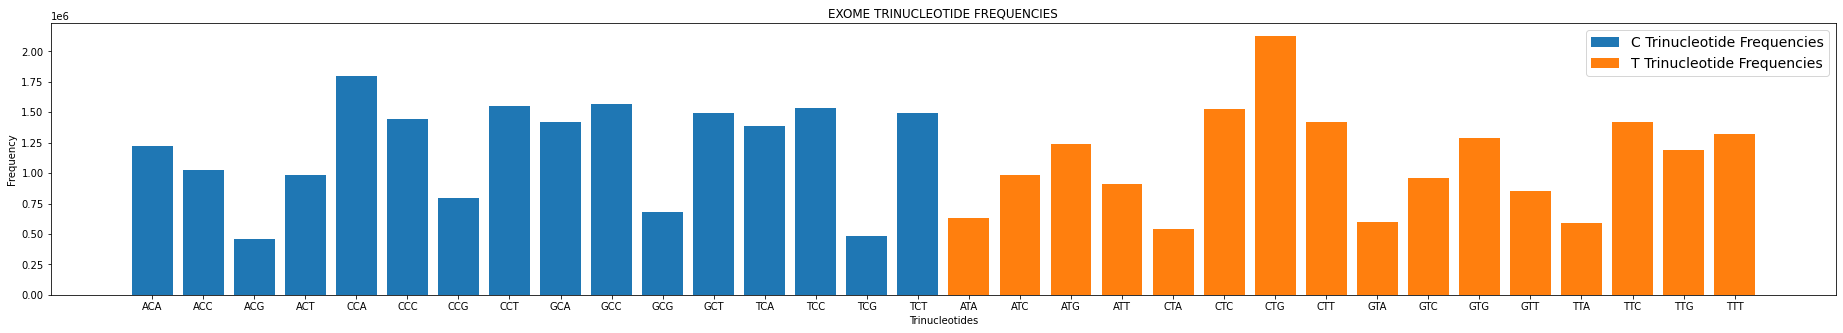

In [4]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(32,5)) # set the size that you'd like (width, height)
plt.bar(trinlist[:16], exome_spec32vec[:16])
plt.bar(trinlist[16:], exome_spec32vec[16:])
plt.title('EXOME TRINUCLEOTIDE FREQUENCIES')
plt.xlabel('Trinucleotides')
plt.ylabel('Frequency')
ax.legend(["C Trinucleotide Frequencies", "T Trinucleotide Frequencies"], fontsize = 14)

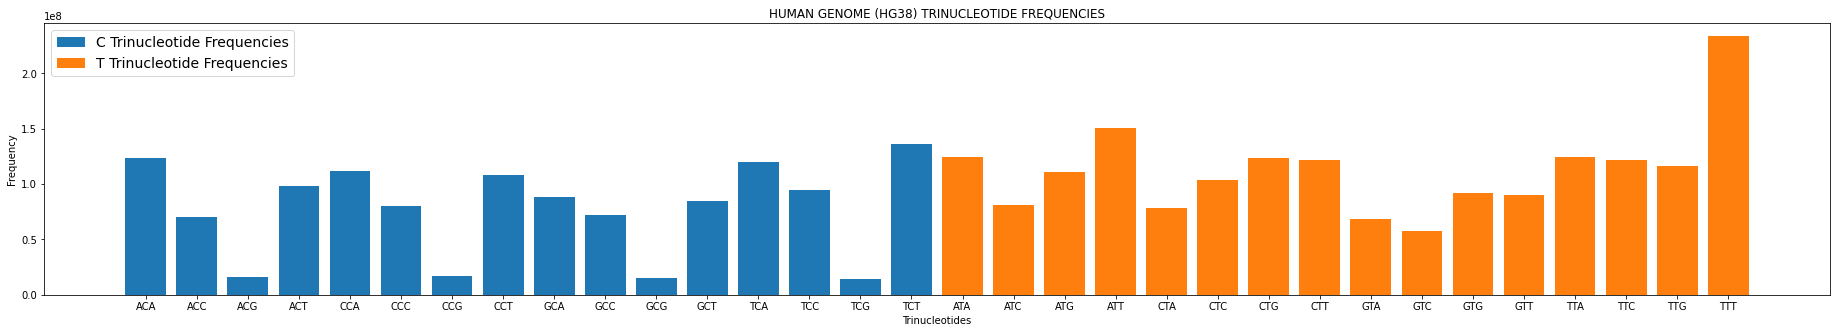

In [5]:
hg38_spec32vec = np.load('hg38-32vec.npy')

f, ax = plt.subplots(figsize=(32,5)) # set the size that you'd like (width, height)
plt.bar(trinlist[:16], hg38_spec32vec[:16])
plt.bar(trinlist[16:], hg38_spec32vec[16:])
plt.title('HUMAN GENOME (HG38) TRINUCLEOTIDE FREQUENCIES')
plt.xlabel('Trinucleotides')
plt.ylabel('Frequency')
ax.legend(["C Trinucleotide Frequencies", "T Trinucleotide Frequencies"], fontsize = 14)

In [6]:
np.save('illumina_hg38_exome-32vec.npy', exome_spec32vec)

In [7]:
# spec_gen = c.get_specific_genome()
# spec_gen = np.array(spec_gen)[:, 1]
# np.save('specific_genome_exome.npy', spec_gen)
# ref_gen = c.get_reference_genome()
# np.save('reference_genome.npy', np.array([ref_gen]))

0.9501534092735555
1.000000214548152



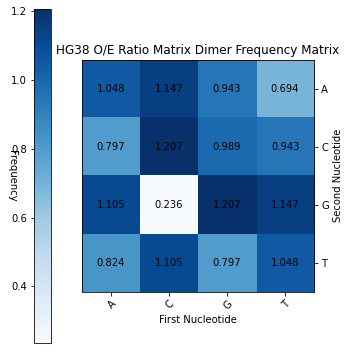

0.9923136203318424
1.0000006701303208


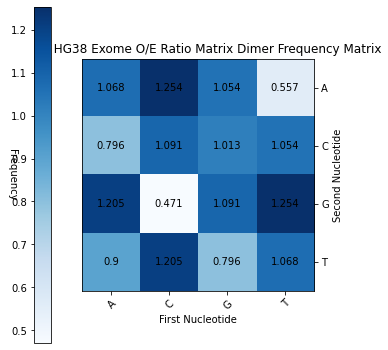

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [32]:
# Dinucleotide sanity check
'''
OBSERVED
--------------------------
AA CA GA TA
AC CC GC TC
AG CG GG TG
AT CT GT TT

AA CA GA TA
AC CC GC  *
AG CG  *  *
AT  *  *  *

CG COUNT SHOULD BE LOWER

EXCPECTED
--------------------------
AA CA GA TA
AC CC GC TC
AG CG GG TG
AT CT GT TT

AA CA GA TA
AC CC GC  *
AG CG  *  *
AT  *  *  *

AA = a%^2 + t%^2
AC = (a% * c%) + (g% * t%)
CG = c% * g%

CG SHOULD be depleted!!!

A, C, G, T = 25%
'''

REF_LENGTH = 3209286105
EXOME_LENGTH = 37453133

def get_nucleotide_dist(genome: str) -> dict:
    genome.upper()
    
    nuc_hash = {
        'A': genome.count('A')/len(genome),
        'C': genome.count('C')/len(genome),
        'G': genome.count('G')/len(genome),
        'T': genome.count('T')/len(genome)
    }
    return nuc_hash

def get_expected_freq(dimer: str, total_count: int, nucleotide_dist: dict):
    rev_comp = c.get_reverse_complement(dimer)
    if rev_comp == dimer:
        return nucleotide_dist[dimer[0]] * nucleotide_dist[dimer[0]]
    else:
        return (nucleotide_dist[dimer[0]] * nucleotide_dist[dimer[1]]) + (nucleotide_dist[rev_comp[0]] * nucleotide_dist[rev_comp[1]])

def get_observed_freq(dimer: str, what_gene: str):
    genome_dist = {'TA': 0.061561070137123225, 'AA': 0.09247036514994664, 'AC': 0.04793299069233343, 'CC': 0.04924711223276866, 'CT': 0.06653126209824163, 'CA': 0.06891907850017005, 'TC': 0.05664271400321287, 'CG': 0.009653157115451382, 'GC': 0.040527905504392545, 'GG': 0.04963790381661843, 'GT': 0.048046220547232885, 'AG': 0.06661478815083706, 'TG': 0.06925737398535865, 'GA': 0.0569512739033281, 'TT': 0.09327653042015087, 'AT': 0.07288366301638913}
    # genome_dist = {'NN': 159969080, 'NT': 271, 'TA': 197567087, 'AA': 296763858, 'AC': 153830681, 'CC': 158048073, 'CT': 213517855, 'CA': 221181041, 'TC': 181782675, 'CG': 30979743, 'GC': 130065644, 'GG': 159302235, 'GT': 154194068, 'AG': 213785914, 'TG': 222266728, 'GA': 182772932, 'TT': 299351073, 'AT': 233904527, 'TN': 233, 'NG': 362, 'GN': 198, 'CN': 422, 'NA': 403, 'NC': 182, 'AN': 365}
    exome_dist = {'AT': 0.0509671113495365, 'TG': 0.07812435878194757, 'GA': 0.06558169646315036, 'AA': 0.06051491072856308, 'AG': 0.07504296102545013, 'GT': 0.04954984673778826, 'TA': 0.03160873083701703, 'AC': 0.049697204236558795, 'CT': 0.07529866727037228, 'GC': 0.06922347457554485, 'CA': 0.07825345345608337, 'GG': 0.07460601493605355, 'TT': 0.060662294927369624, 'TC': 0.06581550867853965, 'CC': 0.07501615418929039, 'CG': 0.03235123213857703}
    # exome_dist = {'AT': 1908878, 'TG': 2926002, 'GA': 2456240, 'AA': 2266473, 'AG': 2810594, 'GT': 1855797, 'TA': 1183846, 'AC': 1861316, 'CT': 2820171, 'GC': 2592636, 'CA': 2930837, 'GG': 2794229, 'TT': 2271993, 'TC': 2464997, 'CC': 2809590, 'CG': 1211655}
    
#     for key in genome_dist:
#         genome_dist[key] /= REF_LENGTH
#     for key in exome_dist:
#         exome_dist[key] /= EXOME_LENGTH
    
    if what_gene == "hg38":
        rev_comp = c.get_reverse_complement(dimer)
        
        if dimer == rev_comp:
            return genome_dist[dimer]
        else:
            return genome_dist[dimer] + genome_dist[rev_comp]
    if what_gene == "exome":
        rev_comp = c.get_reverse_complement(dimer)
        
        if dimer == rev_comp:
            return exome_dist[dimer]
        else:
            return exome_dist[dimer] + exome_dist[c.get_reverse_complement(dimer)]
#     dimer_freq = 0
#     # print(c.get_reverse_complement(dimer))
#     for i in range(len(trinlist)):
#         curr_trin = trinlist[i]
        
#         if (dimer in curr_trin) or (c.get_reverse_complement(dimer) in curr_trin):
#             if what_gene == "hg38":
#                 dimer_freq += hg38_spec32vec[trinlist.index(curr_trin)]
#             elif what_gene == "exome":
#                 dimer_freq += exome_spec32vec[trinlist.index(curr_trin)]
    
#     if what_gene == "hg38":
#         dimer_freq /= np.sum(hg38_spec32vec)# REF_LENGTH
#     if what_gene == "exome":
#         dimer_freq /= np.sum(exome_spec32vec)# EXOME_LENGTH
        
#     print(np.sum(hg38_spec32vec))
#     print()
#     print(np.sum(exome_spec32vec))
    
    return dimer_freq

def get_freq_mat(dimer_mat: list, o_e_type: str, what_gene: str = None, total_count: int = None):
    freq_mat = np.zeros((len(dimer_mat), len(dimer_mat[0])))
    
    nucleotide_dist = {}
    if o_e_type == "expected":
        if what_gene == "hg38":
#             genome = c.get_reference_genome()
#             nucleotide_dist = get_nucleotide_dist(genome)
            nucleotide_dist = {'A': 0.2974255613496157, 'C': 0.2022813843236835, 'G': 0.2024281743774265, 'T': 0.2978648799492743}
#             nucleotide_dist = {'A': 0.1353712264304338, 'C': 0.09206699974167619, 'G': 0.0921338102387727, 'T': 0.13557117931060872}
        elif what_gene == "exome":
#             genome = c.get_specific_genome()
#             genome = np.array(genome)
#             genome = ''.join(genome[:, 1].tolist())
#             nucleotide_dist = get_nucleotide_dist(genome)
            nucleotide_dist = {'A': 0.2380362108981503, 'C': 0.26221666984596886, 'G': 0.26144310062524323, 'T': 0.2383040186306376}
#             nucleotide_dist = {'A': 0.23162294593619176, 'C': 0.2551519254744323, 'G': 0.25439919805907824, 'T': 0.2318835382877048}

    for i in range(len(dimer_mat)):
        for j in range(len(dimer_mat[i])):
            if o_e_type == "observed":
                freq_mat[i][j] = get_observed_freq(dimer_mat[i][j], what_gene)
            elif o_e_type == "expected":
                freq_mat[i][j] = get_expected_freq(dimer_mat[i][j], total_count, nucleotide_dist)
            else:
                raise(f"\"{o_e_type}\" NOT A Valid O/E Function Type | Must be \"observed\" or \"expected\"")

    return freq_mat

def plot_freq_mat(freq_mat: list, title: str):
    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(np.array(freq_mat), cmap="Blues")

    nucs = list("ACGT")
    # Show all ticks and label them with the respective list entries
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.set_xticks(np.arange(len(nucs)), labels=nucs)
    ax.set_yticks(np.arange(len(nucs)), labels=nucs)
    ax.set_xlabel("First Nucleotide")
    ax.set_ylabel("Second Nucleotide")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    cbar_kw = {}
    cbarlabel = "Frequency"
    cbar = ax.figure.colorbar(im, ax=ax, location='left', **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Loop over data dimensions and create text annotations.
    for i in range(len(nucs)):
        for j in range(len(nucs)):
            text = ax.text(j, i, round(float(np.array(freq_mat)[i, j]), 3),
                           ha="center", va="center", color="black")

    ax.set_title(f"{title} Dimer Frequency Matrix")
    fig.tight_layout()
    plt.show()
    
    return plt

dimer_mat = [
    ["AA", "CA", "GA", "TA"],
    ["AC", "CC", "GC", "TC"],
    ["AG", "CG", "GG", "TG"],
    ["AT", "CT", "GT", "TT"]
]

# HG38
observed_freq_mat_hg38 = get_freq_mat(dimer_mat, "observed", "hg38")
expected_freq_mat_hg38 = get_freq_mat(dimer_mat, "expected", "hg38", total_count=np.sum(hg38_spec32vec))

out_str = "dimer   [observed, expected]\n"
for i in range(len(dimer_mat)):
    for j in range(len(dimer_mat[i])):
        dimer = dimer_mat[i][j]
        odimer_freq = observed_freq_mat_hg38[i][j]
        edimer_freq = expected_freq_mat_hg38[i][j]
        
        out_str += f"{dimer}      {odimer_freq}, {edimer_freq}\n"

# print(out_str)
        
fl = np.sum(observed_freq_mat_hg38[0, :])
sl = np.sum(observed_freq_mat_hg38[1, :-1])
tl = np.sum(observed_freq_mat_hg38[2, :-2])
fol = np.sum(observed_freq_mat_hg38[3, :-3])

efl = np.sum(expected_freq_mat_hg38[0, :])
esl = np.sum(expected_freq_mat_hg38[1, :-1])
etl = np.sum(expected_freq_mat_hg38[2, :-2])
efol = np.sum(expected_freq_mat_hg38[3, :-3])

print(fl + sl + tl + fol)
print(efl + esl + etl + efol)
print()

OE_ratio_matrix_hg38 = np.divide(observed_freq_mat_hg38, expected_freq_mat_hg38)

# plot_freq_mat(observed_freq_mat_hg38, "HG38")
# plot_freq_mat(expected_freq_mat_hg38, "HG38")

plot_freq_mat(OE_ratio_matrix_hg38, "HG38 O/E Ratio Matrix")

observed_freq_mat_exome = get_freq_mat(dimer_mat, "observed", "exome")
expected_freq_mat_exome = get_freq_mat(dimer_mat, "expected", "exome", total_count=np.sum(exome_spec32vec))

out_str = "dimer   [observed, expected]\n"
for i in range(len(dimer_mat)):
    for j in range(len(dimer_mat[i])):
        dimer = dimer_mat[i][j]
        odimer_freq = observed_freq_mat_exome[i][j]
        edimer_freq = expected_freq_mat_exome[i][j]
        
        out_str += f"{dimer}      {odimer_freq}, {edimer_freq}\n"

# print(out_str)

fl = np.sum(observed_freq_mat_exome[0, :])
sl = np.sum(observed_freq_mat_exome[1, :-1])
tl = np.sum(observed_freq_mat_exome[2, :-2])
fol = np.sum(observed_freq_mat_exome[3, :-3])

efl = np.sum(expected_freq_mat_exome[0, :])
esl = np.sum(expected_freq_mat_exome[1, :-1])
etl = np.sum(expected_freq_mat_exome[2, :-2])
efol = np.sum(expected_freq_mat_exome[3, :-3])

print(fl + sl + tl + fol)
print(efl + esl + etl + efol)

OE_ratio_matrix_exome = np.divide(observed_freq_mat_exome, expected_freq_mat_exome)

# plot_freq_mat(observed_freq_mat_exome, "HG38 Exome")
# plot_freq_mat(expected_freq_mat_exome, "HG38 Exome")

plot_freq_mat(OE_ratio_matrix_exome, "          HG38 Exome O/E Ratio Matrix")

[1.12832913 0.94740122 0.21478612 0.89891319 1.50964278 1.58082675
 0.34040252 1.45374103 1.18416519 1.42777381 0.29478478 1.14448068
 1.09628885 1.27673336 0.186967   1.24302976 0.77281163 0.74591413
 1.01829071 0.93676461 0.71520074 1.39016055 1.66663929 1.11497573
 0.62564205 0.77382982 1.24241512 0.82096727 0.77267464 1.11731199
 1.05999156 1.45389448]
[1.11307367 0.84927563 0.37762164 0.89399845 1.48906193 1.09159097
 0.59685603 1.28346134 1.17982131 1.18280412 0.51516    1.23649942
 1.26334391 1.27450733 0.39798527 1.35909224 0.63240876 0.89543566
 1.13162223 0.91315682 0.49450357 1.26708697 1.76285746 1.29251522
 0.54750702 0.79667685 1.06793452 0.78029323 0.58943477 1.29724879
 1.08208304 1.32676859]


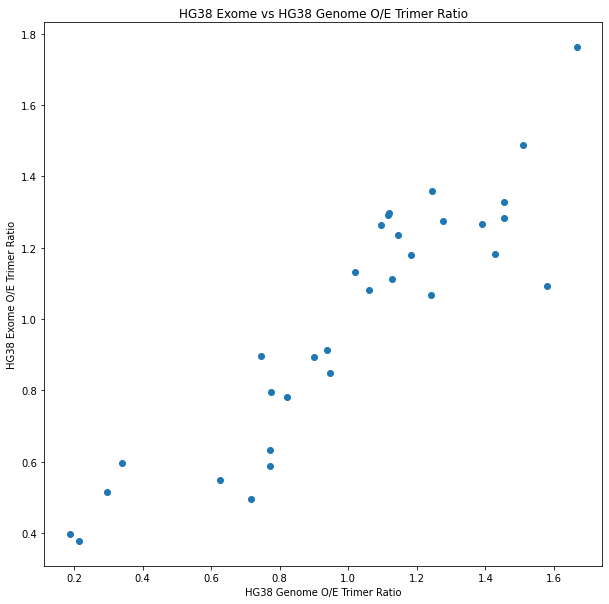

In [9]:
ref_nucleotide_dist = {'A': 0.2974255613496157, 'C': 0.2022813843236835, 'G': 0.2024281743774265, 'T': 0.2978648799492743}
spec_nucleotide_dist = {'A': 0.2380362108981503, 'C': 0.26221666984596886, 'G': 0.26144310062524323, 'T': 0.2383040186306376}

def get_expected_prob(trimer: str, nuc_dist):
    rev_comp = c.get_reverse_complement(trimer)
    if trimer == rev_comp:
        return nuc_dist[trimer[0]] * nuc_dist[trimer[1]] * nuc_dist[trimer[2]]
    else:
        return (nuc_dist[trimer[0]] * nuc_dist[trimer[1]] * nuc_dist[trimer[2]]) + (nuc_dist[rev_comp[0]] * nuc_dist[rev_comp[1]] * nuc_dist[rev_comp[2]])

ref_expected_trinlist = [get_expected_prob(trimer, ref_nucleotide_dist) for trimer in trinlist]
spec_expected_trinlist = [get_expected_prob(trimer, spec_nucleotide_dist) for trimer in trinlist]

hg38_spec32vec_dist = hg38_spec32vec/np.sum(hg38_spec32vec)
exome_spec32vec_dist = np.array(exome_spec32vec)/np.sum(exome_spec32vec)

X = np.divide(hg38_spec32vec_dist, ref_expected_trinlist)
y = np.divide(exome_spec32vec_dist, spec_expected_trinlist)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('HG38 Genome O/E Trimer Ratio')
ax.set_ylabel('HG38 Exome O/E Trimer Ratio')
ax.set_title('HG38 Exome vs HG38 Genome O/E Trimer Ratio')
ax.scatter(X, y)

print(X)
print(y)

_C_ count (Exome) - 19327148
_T_ count (Exome) - 17612194
_C_ count (HG38)  - 1250061304
_T_ count (HG38)  - 1799252034


Text(0.5, 1.0, 'C&T Centered 3mers')

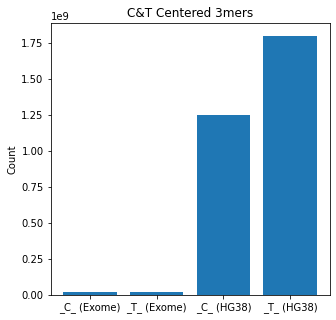

In [10]:
c_exome = np.sum(exome_spec32vec[:16])
t_exome = np.sum(exome_spec32vec[16:])
c_hg = np.sum(hg38_spec32vec[:16])
t_hg = np.sum(hg38_spec32vec[16:])

print(f"_C_ count (Exome) - {str(c_exome)}")
print(f"_T_ count (Exome) - {str(t_exome)}")
print(f"_C_ count (HG38)  - {str(c_hg)}")
print(f"_T_ count (HG38)  - {str(t_hg)}")

f, ax = plt.subplots(figsize=(5,5)) # set the size that you'd like (width, height)
plt.bar(["_C_ (Exome)", "_T_ (Exome)", "_C_ (HG38)", "_T_ (HG38)"], [c_exome, t_exome, c_hg, t_hg])
plt.ylabel("Count")
plt.title("C&T Centered 3mers")

exome NCG count - 2410233
hg38  NCG count - 61959598


Text(0.5, 1.0, 'NCG Counts')

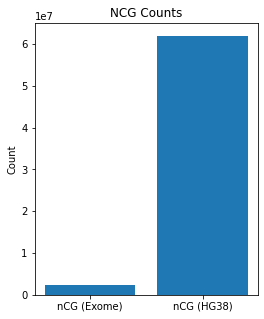

In [11]:
# ACG+CCG+GCG+TCG
exome_nCG_count = exome_spec32vec[trinlist.index("ACG")] + exome_spec32vec[trinlist.index("CCG")] + exome_spec32vec[trinlist.index("GCG")] + exome_spec32vec[trinlist.index("TCG")]
hg38_nCG_count = hg38_spec32vec[trinlist.index("ACG")] + hg38_spec32vec[trinlist.index("CCG")] + hg38_spec32vec[trinlist.index("GCG")] + hg38_spec32vec[trinlist.index("TCG")]

print(f"exome NCG count - {str(exome_nCG_count)}")
print(f"hg38  NCG count - {str(hg38_nCG_count)}")

f, ax = plt.subplots(figsize=(4,5)) # set the size that you'd like (width, height)
plt.bar(["nCG (Exome)", "nCG (HG38)"], [exome_nCG_count, hg38_nCG_count])
plt.ylabel("Count")
plt.title("NCG Counts")

In [12]:
normalized_exome_spec32vec = exome_spec32vec/np.sum(exome_spec32vec)
normalized_hg38_spec32vec = hg38_spec32vec/np.sum(hg38_spec32vec)

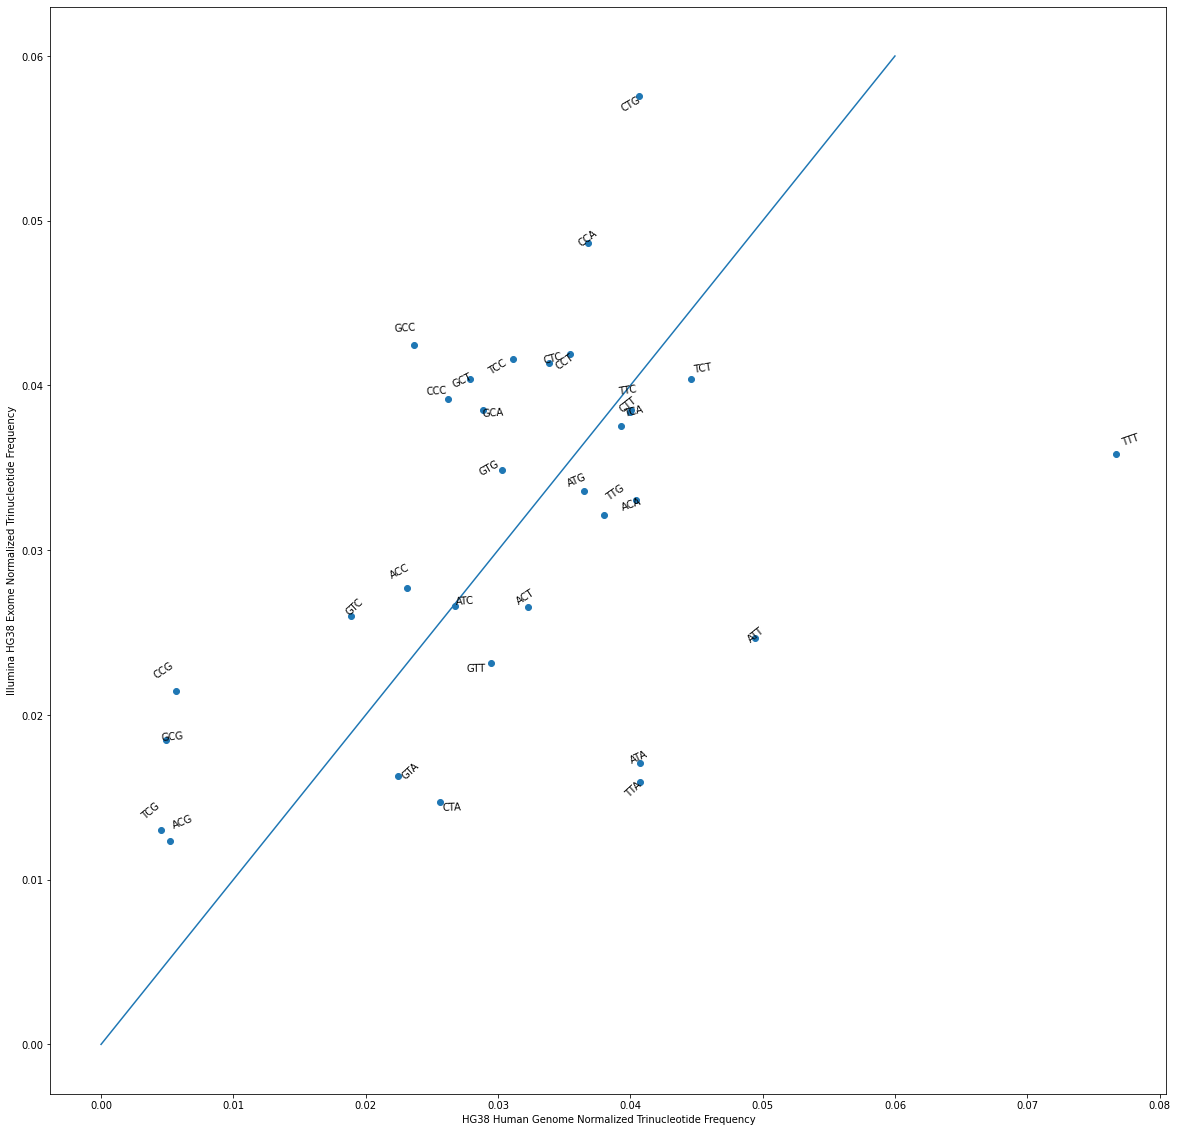

In [35]:
import random 

'''
m = -0.14255
b = 0.02679

y = np.poly1d([m, b])

SSx = 0.0052
'''

plt.figure(figsize=(20, 20))
plt.scatter(normalized_hg38_spec32vec, normalized_exome_spec32vec, marker='o')
test_x = [0, 0.06]
plt.plot(test_x, test_x)
plt.xlabel('HG38 Human Genome Normalized Trinucleotide Frequency')
plt.ylabel('Illumina HG38 Exome Normalized Trinucleotide Frequency')
# plt.plot(y)

for i, (x_val, y_val) in enumerate(zip(normalized_hg38_spec32vec.tolist(), normalized_exome_spec32vec.tolist())):
        plt.annotate(trinlist[i], (x_val, y_val), textcoords="offset points", xytext=(random.randint(-15, 15),random.randint(-15, 15)), ha='center', rotation=random.randint(0, 45))
#     plt.text(x_val, y_val, trinlist[i], ha='center', va='bottom')

In [14]:
# from sklearn.linear_model import LinearRegression
from scipy import stats

X = normalized_hg38_spec32vec
y = normalized_exome_spec32vec

slope, intercept, r, p, std_err = stats.linregress(X, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(X, y)
plt.plot(X, mymodel)
plt.show()
# reg = LinearRegression().fit(X, y)
# print(reg.score(X, y))
# print(reg.coef_)
# print(reg.intercept_)

NameError: name 'x' is not defined

In [ ]:
X = [round(_, 4) for _ in normalized_hg38_spec32vec.tolist()]
y = [round(_, 4) for _ in normalized_exome_spec32vec.tolist()]

print(','.join(map(str, X)))
print()
print(','.join(map(str, y)))

In [ ]:
np.divide(np.ones((3, 3)) * 4, np.ones((3, 3)) * 2)

In [30]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [59]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
